# **AP155 Lab Assignment** 
## Module 4: Fourier Transforms

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible. 

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Problems 1 to 3 are worth 20, 30, and 50 points, respectively).

_Due Date_: **5PM of November 5 (Thu)**


### Student Information 

_Full Name (Last Name, First Name)_: Suico, John Samuel O.\
_Student No._: 2018-05897 \
_Section_: T

### Submission Information

_Date and Time Submitted (most recent upload)_: November 10, 2020 4:00 PM

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** John Samuel O. Suico

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/20
* Problem 2 - []/30
* Problem 3 - []/50

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_ 

### PROBLEM 1 (20 pts.; 50/50 for code & discussion) 
**Fourier transform of a simple function**

1. Calculate the coefficients in the discrete Fourier transforms of the modulated sine wave $y_n = \sin(\pi n/N) sin(20\pi n/N)$ sampled at $N = 1000$ evenly spaced points using your own user-defined function. *(10 pts.)*

2. Make a plot of their amplitudes similar to the plot shown in Fig. 7.4 of the Newman text. *(10 pts.)*


1. Here, I've created the function `generatey_n` to generate the mathematical function values $y(n)$ according to the function above from $n = 0$ to $n = N$ (i.e. $N = 1000$). This list of function values can then passed on as arguments to the function `fdft` which uses these function values to calculate and return the array of the corresponding Fourier coefficients <sub>[1]</sub>

    I then assign the variable `y` to the value returned by the function `generatey_n`. I then assign the variable `c` to the value returned by the function `fdft` with argument `y`.

<sub>[1] which differs from the "true" Fourier coefficients by a factor of $\frac{1}{N}$ based on the definition of the Discrete Fourier Transform).</sub>

In [1]:
from numpy import sin, arange, pi, zeros, exp

def generatey_n():
    N = 1000
    n = arange(0,N,1)
    y = list()
    for i in n:
        y.append(sin(pi*i/1000)*sin(20*pi*i/N))
    return y
    
def fdft(y):
    N = len(y)
    c = zeros(N//2+1,complex)
    for k in range(N//2+1):
        for n in range(N):
            c[k] += y[n]*exp(-2j*pi*k*n/N)
    return c
    
y = generatey_n()
c = fdft(y)

2. Here, I've imported the `plot` function from the `pylab` module.

Text(0, 0.5, '|c|')

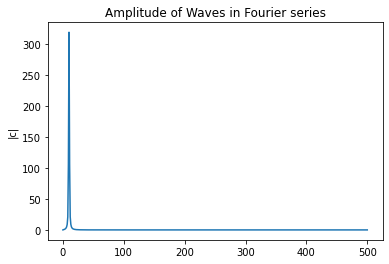

In [2]:
import matplotlib.pyplot as plt

plt.plot(abs(c))
plt.title("Amplitude of Waves in Fourier series")
plt.ylabel("|c|")

### PROBLEM 2 (30 pts.; 50/50 for code & discussion)

**Fourier filtering**

For this problem, you will use data from a text file called $\tt dow.txt$. It contains the daily closing value for each business day from late 2006 until the end of 2010 of the Dow Jones Industrial Average, which is a measure of average prices on the US stock market.

First, you need to make a copy of the file $\tt dow.txt$ and save it to a folder in your **own Google Drive**. This file is available from the AP155 Course Pack Google Drive (in the General > Datasets folder) and directly from this link: https://drive.google.com/file/d/1CHXGF2s9HvKJPTVRWeq5tJpgFxYuOgOg/view?usp=sharing

The code cells below will (1) mount Google Drive and (2) load the data from your Google Drive. Follow the instructions below to load the data. Then, do the following:

1. Plot the data on a graph. *(5 pts.)*

2. Calculate the coefficients of the discrete Fourier transform of the data using the function $\tt rfft$ from numpy's $\tt fft$ library, which produces an array of $\frac{1}{2}N +1$ complex numbers. *(10 pts.)*

3. Now set all but the first 10% of the elements of this array to zero (i.e., set the last 90% to zero but keep the values of the first 10%). *(5 pts.)* 

4. Calculate the inverse Fourier transform of the resulting array, zeros and all, using the function $\tt irfft$, and plot it on the same graph as the original data. You may need to vary the colors of the two curves to make sure they both show up on the graph. Comment on what you see. What is happening when you set the Fourier coefficients to zero? *(10 pts.)*

Mount the Google Drive where you saved the file $\tt dow.txt$. 

When you run this cell, you will be asked to sign in to your Google account and you will get an authorization code. Paste the code on the provided cell to mount the Google Drive.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Run this command to list the directories in your Google Drive and check that the mount was successful.

In [ ]:
!ls drive/My\ Drive

Define the directory path to the location of the file $\tt dow.txt$, i.e. if it is in a folder named "AP155" under My Drive, then the file path will be "/content/drive/My Drive/AP155". Change the string variable in the code cell below, as needed:

In [ ]:
file_path = "/content/drive/My Drive/AP155/"

Use numpy's $\tt loadtxt$ function ([documentation](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html)) to load the $\tt dow.txt$ file and save the data into a numpy array named $\tt dow$.

In [ ]:
import numpy as np
dow = np.loadtxt(file_path+"dow.txt")

Print out the first 10 elements of the array $\tt dow$. Check that you get the ff. output:
```
array([12121.71, 12136.44, 12226.73, 12221.93, 12194.13, 12283.85, 12331.6 , 12309.25, 12278.41, 12307.48])
``` 

In [ ]:
dow[0:10]

Now you can start to write code for this problem!

1. After loading the file and saving its contents to `dow` as an array, I then call the `pyplot.plot` function to plot the values of `dow`. 

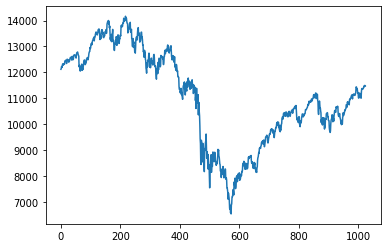

In [4]:
import numpy as np
dow = np.loadtxt("dow.txt")
plt.plot(dow)

2. Afterwards, I import the `rfft` function from the `numpy.fft` module. I then call the `rfft` function to calculate the Fourier transform coefficients and assign it to the variable `c_dow`.

In [5]:
from numpy.fft import rfft
c_dow = rfft(dow)

3. I then create a function `editc_dow` which sets the last 90% function values of `c_dow` to zero and returns the array of edited fourier coefficients. I assign this new set of fourier coefficients to `c_new`.

In [6]:
def editc_dow(c_dow):
    c_new = c_dow
    N = len(c_new)
    first = int(0.10*N)
    for i in range(first,N):
        c_new[i] =  0
    return c_new
c_new = editc_dow(c_dow)


4. I then convert `c_new` back into its function values via the imported `irfft` function from the `numpy.fft` module and assign this to the variable `dow_new`. I then plot `dow_new` on top of `dow_new` using the `pyplot` module.

c:\users\hydroforth\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


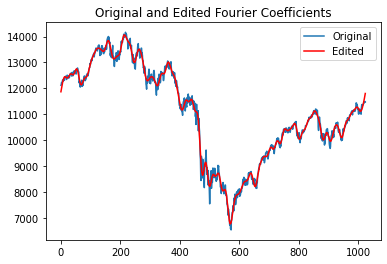

In [7]:
from numpy.fft import irfft
import matplotlib.pyplot as plt

dow_new = irfft(c_new)

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(dow, label = "Original")
ax2 = fig.add_subplot(111)
ax2.plot(dow_new, c = "red", label = "Edited")

plt.title("Original and Edited Fourier Coefficients")
plt.legend(loc = 'upper right')

The graph of the edited fourier coefficients is very similar to the original in structure and is only missing the finer details (such as peaks in the graph). This can be more easily explained by plotting the fourier coefficients:

Text(0.5, 1.0, 'Fourier transform of dow.txt data')

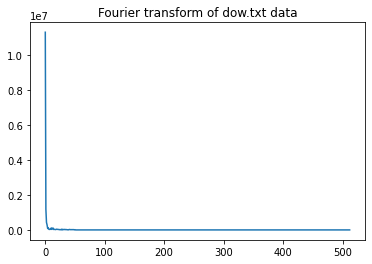

In [8]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.plot(abs(c_dow))
plt.title("Fourier transform of dow.txt data")

The peak in the initial parts of the graph (10% of the graph) corresponds to the frequency of the main wave. For a very non-periodic looking wave like the data shown by "dow.txt", the main wave looks like the whole section of the data set. The parts after the first 10% of the graph represent the finer details, such as noise, which is evident in the original data set but has been removed from the edited data set.

### PROBLEM 3 (50 pts.; 50/50 for code & discussion)

**Real-world Application: Image deconvolution**

_Refer to Exercise 7.9 of the Newman text_ For this problem, you will use data from a text file called $\tt blur.txt$. It contains a grid of values representing brightness on a black-and-white photo-- a badly out-of-focus one that has been deliberately blurred using a Gaussian point spread function of width $\sigma = 25$. 

Similar to what you did for Problem 2, you need to make a copy of the file $\tt blur.txt$ and save it to the same folder in your **own Google Drive** where you saved $\tt dow.txt$. This file is available from the AP155 Course Pack Google Drive (in the General > Datasets folder) and directly from this link: https://drive.google.com/file/d/1CHXGF2s9HvKJPTVRWeq5tJpgFxYuOgOg/view?usp=sharing

1. Use numpy's $\tt loadtxt$ to load the grid of values into a two-dimensional array of real numbers, e.g.:
```
blur = np.loadtxt(file_path+"blur.txt")
``` 
Plot the values on the screen of the computer as a density plot. (Hint: Use $\tt imshow$ and $\tt show$ from the pylab package.) You should see the photo appear. If you get something wrong it might be upside-down. Work with the details of your program until you get it appearing correctly. (Hint: The picture has the sky, which is bright, at the top and the ground, which is dark, at the bottom.) *(10 pts.)*

2. Create an array of the point spread function (PSF), of the same size as the photo, based on the Gaussian function $f(x,y) = exp\left(-\frac{x^2+y^2}{2\sigma^2}\right)$. In particular, get the sum of 4 Gaussians with $\sigma = 25$ centered on each of the four corners of the image. _Refer to the figure on page 325 of the Newman text._ *(10 pts.)*

3. Make a density plot of these values on the screen, so that you get a visualization of your point spread function. *(10 pts.)*

3. Apply Fourier transforms using the functions $\tt rfft2$ and $\tt irfft2$ from numpy's $\tt fft$ package to perform image deconvolution as follows:

* Get Fourier transforms of both the blurred image and the PSF from (1) and (2) 
* Divide one by the other
* Perform an inverse transform to get the unblurred photo
* Display the unblurred photo on the screen

When you are done, you should be able to make out the scene in the photo, although probably it will still not be perfectly sharp. *(20 pts.)*

   Hint: One thing you'll need to deal with is what happens when the Fourier transform of the point spread function is zero, or close to zero. In that case if you divide by it you'll get an error (because you can't divide by zero) or just a very
large number (because you're dividing by something small). A workable compromise is that if a value in the Fourier transform of the point spread function is smaller than a certain amount $\epsilon$ you don't divide by it-- just leave that coefficient alone. The value of $\epsilon$ is not very critical but a reasonable value seems to be $10^{-3}$. 

1. Here, I've loaded the values of the text file "blur.txt" and saved it to the variable `blur`. I then use the `imshow` function from the `pylab` module to create a gray-scaled density plot of the data set.

Text(0.5, 1.0, 'Blurred Image')

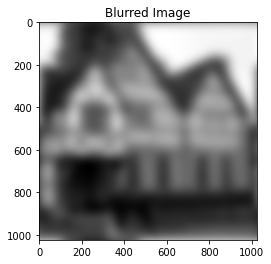

In [9]:
from pylab import imshow
blur = np.loadtxt("blur.txt")
imshow(blur, cmap = 'gray')
plt.title("Blurred Image")

2. Here, I've created two functions: (1) `guassian` takes 2 parameters `x` and `y` and returns the value of the function $f(x,y) = exp\left(-\frac{x^2+y^2}{2\sigma^2}\right)$ with $\sigma = 25$<sub>[1]</sub>; (2) `psfxn` generates `x` and `y` inputs with size and offset specifically designed for the image to be unblurred (after checking, I determined the size of the image to be $1024 \times 1024$). These `x` and `y` inputs are then passed on as arguments to the `gaussian` function to return values that are to be saved as the point spread function. These values are saved to the variable `psf` and is returned as an array.

I assign the variable `psf` to store the value returned after calling `psfxn`.

<sub>[1] The variabl `sigma` denotes $\sigma$</sub>

In [10]:
from numpy import array

def gaussian(x, y):
    sigma = 25
    return exp(-(x**2+y**2)/(2*sigma**2))

def psfxn():
    psf,x,y = [],[],[]
    for i in range(0,513):
        x.append(i)
        y.append(i)
    for i in range(-512,0,1):
        x.append(i)
        y.append(i)
    for j in y:
        f = []
        for i in x:
            f.append(gaussian(i,j))
        psf.append(f)
    psf = array(psf)
    return psf

psf = psfxn()

3. Here, I've used the `imshow` function from the `pyplot` module to create a grayscaled density plot of the `psf` data set.

Text(0.5, 1.0, 'Point Spread Function')

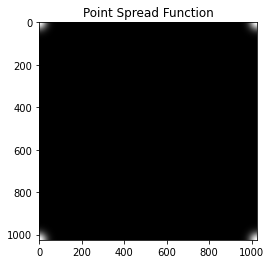

In [11]:
imshow(psf, cmap = "gray")
plt.title("Point Spread Function")

4. Here, I've taken the Fourier transforms of `psf` and `blur` via the `rfft2` function from the `numpy.fft` and saved them to the variables `b_k` and `f_k`, respectively. The function `createa_k` then divides each corresponding value in `b_k` by the point spread function's fourier transform `f_k` and saves this to the 2D array `a_k`. However, because of machine constraints, an exception is thrown whenever dividing by a number that is very close to zero. As such, we will be keeping the data points from `b_k` whenever the corresponding value in `f_k` is less than or equal to $10^{-3}$.

    Afterwards, the inverse fourier transform of `a_k` is taken via the `irftt2` function from the `numpy.fft` module and saved to the variable `unblur`. I then create a grayscaled density plot of `unblur` using the `imshow` function.

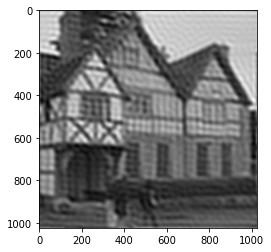

In [12]:
from numpy.fft import rfft2,irfft2

b_k = rfft2(blur)
f_k = rfft2(psf)
epsilon = 10**-3

def createa_k():
    a_k = []
    for i in range(0,len(b_k)):
        newlist = []
        for j in range(0, len(b_k[i])):
            if(f_k[i][j] > epsilon):
                newlist.append(b_k[i][j] /f_k[i][j])
            else:
                newlist.append(b_k[i][j])
        a_k.append(newlist)
    a_k = array(a_k)
    return a_k

a_k = createa_k()
unblur = irfft2(a_k)
imshow(unblur, cmap = "gray")
plt.show("Unblurred Image")